<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Image-Classifiers---Part-Four" data-toc-modified-id="Image-Classifiers---Part-Four-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Image Classifiers - Part Four</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li></ul></li><li><span><a href="#ReLu-activations-and-&quot;He&quot;-initialization" data-toc-modified-id="ReLu-activations-and-&quot;He&quot;-initialization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ReLu activations and "He" initialization</a></span><ul class="toc-item"><li><span><a href="#What-is-it?" data-toc-modified-id="What-is-it?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>What is it?</a></span></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Implementation</a></span><ul class="toc-item"><li><span><a href="#&quot;He-Initialization&quot;" data-toc-modified-id="&quot;He-Initialization&quot;-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>"He Initialization"</a></span></li><li><span><a href="#ReLU" data-toc-modified-id="ReLU-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>ReLU</a></span></li></ul></li></ul></li><li><span><a href="#Drop-out-regularization" data-toc-modified-id="Drop-out-regularization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Drop out regularization</a></span><ul class="toc-item"><li><span><a href="#What-is-it?" data-toc-modified-id="What-is-it?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>What is it?</a></span></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Implementation</a></span></li></ul></li><li><span><a href="#Mini-batch-gradient-descent" data-toc-modified-id="Mini-batch-gradient-descent-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mini-batch gradient descent</a></span><ul class="toc-item"><li><span><a href="#What-is-it?" data-toc-modified-id="What-is-it?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>What is it?</a></span></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Implementation</a></span></li></ul></li><li><span><a href="#Testing-what-we-have-so-far" data-toc-modified-id="Testing-what-we-have-so-far-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing what we have so far</a></span></li><li><span><a href="#Adam-optimization" data-toc-modified-id="Adam-optimization-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Adam optimization</a></span><ul class="toc-item"><li><span><a href="#What-is-it?" data-toc-modified-id="What-is-it?-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>What is it?</a></span><ul class="toc-item"><li><span><a href="#Adam" data-toc-modified-id="Adam-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Adam</a></span></li><li><span><a href="#Momentum" data-toc-modified-id="Momentum-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Momentum</a></span></li><li><span><a href="#RMSprop" data-toc-modified-id="RMSprop-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>RMSprop</a></span></li><li><span><a href="#Combined-summary-resource" data-toc-modified-id="Combined-summary-resource-6.1.4"><span class="toc-item-num">6.1.4&nbsp;&nbsp;</span>Combined summary resource</a></span></li></ul></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Implementation</a></span></li></ul></li><li><span><a href="#Testing-it-out" data-toc-modified-id="Testing-it-out-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Testing it out</a></span></li><li><span><a href="#In-progress...." data-toc-modified-id="In-progress....-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>In progress....</a></span></li></ul></div>

<h1 style="text-align: center;">Image Classifiers - Part Four</h1>

## Introduction

<img style="float: left; margin-right: 25px;" src="images/catMonocle.jpg" />

The overall goal of this series of write-ups is to explore a number of models performing binary classification on a given set of images.  In this fourth write-up we want to add optimization and regularization into the deep nueral network model code we wrote previously.  

In the [last write-up] we summarized with the following observation:

_What is interesting is that we are definitely suffering from a variance problem (i.e. over fitting) the way things stand. The models consistently reach training accuracy rates of 99%, but the test accuracy isn't much more than what we achieved with a shallow neural network. Hopefully as we move forward with additional regularization techniques in later write ups this will improve, and we'll be able to increase the training accuracy rates._

Thus the goals of this write-up are to being adding elements to the model to combat variance as well as optimize how quickly and accurately we can train our neural networks.  This write-up will cover:

* He initialization
* Switching over to the ReLu activation function
* Drop out regularization
* Mini-batch gradient descent
* Adam optimization


For reference here are links to the previous entries in this series:
* [The logistics of acquiring and developing an image dataset](https://github.com/nrasch/Portfolio/tree/master/Machine-Learning-and-AI/Python/P02-Image-Dataset-Creation-Feb-2018)
* [Binary image classification utilizing logistic regression with gradient descent](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning-and-AI/Python/P03-Image-Classifiers-Mar-2018/BinaryImageClassifier-PartOne.ipynb)
* [Binary image classification utilizing a shallow neural network](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning-and-AI/Python/P03-Image-Classifiers-Mar-2018/BinaryImageClassifier-PartTwo.ipynb)

So, let's get started!


# ReLu activations and "He" initialization

## What is it?

First, for those interested the paper can be found here describing these topics:
* https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/He_Delving_Deep_into_ICCV_2015_paper.pdf


The rectified linear unit activation (ReLu) function defines the output of a node given an input or set of inputs. For example in the image below the calcuation 

\begin{equation}z^{(i)} = w^T x^{(i)} + b\end{equation} 

is fed into the activation function \begin{equation}a^{(i)} = sigma(z^{(i)})\end{equation}


And below is a diagram of a neural network using a ReLu activation in the cells, and then a final sigmoid activation to output the model's y-hat values:

<img src="images/relu_activation.png" align="left" height="30%" width="30%" padding-left="100px" />
<p style="clear: both;">&nbsp;</p>

Benfits of utilizing ReLu include:
* Mitigate exploding or vanishing gradient problems
* Faster learning
* Avoids computing exponents
* Outputs sparse representations with true zeros

Note that if you wish to read more about rectified linear units a good article can be found [here](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning).

The "He" initialization is a method to initialize the parameters in a neural network utilizing ReLu functions.  In short the formula is:
$\sqrt{\frac{2}{\text{dim(L - 1)}}}$  where L is a layer in the neural network.  

The paper cited above summarizes with the following:

_Second, we derive a robust initialization method that particularly considers the rectifier nonlinearities. This method enables us to train extremely deep rectified models directly from scratch and to investigate deeper or wider network architectures.  Based on the learnable activation and advanced initialization, we achieve 4.94% top-5 test error on the ImageNet 2012 classification dataset. This is a 26% relative improvement over the ILSVRC 2014 winner (GoogLeNet, 6.66% )._

And finally, [here](https://en.wikipedia.org/wiki/Activation_function) is a good summary of the various activation functions and their graphs.


## Implementation

### "He Initialization"

In [17]:
#  Initialize model params (i.e. W and b)
def initilizeParameters(dimensionDict):

    params = {}
    lastDimSize = dimensionDict["numberInputs"]
    
    for index, size in enumerate(dimensionDict['hiddenLayerSizes'], start=1):
        wName = "w" + str(index)
        bName = "b" + str(index)
        
        # Initialize utilizing "He Initialization"
        np.random.seed(10)  # Yes, this has to be done every time...  :(
        params[wName] = np.random.randn(size, lastDimSize) * np.sqrt(2/lastDimSize)
        params[bName] = np.zeros((size, 1))
        lastDimSize = size
   
    # add final output layer
    wName = "w" + str(len(dimensionDict['hiddenLayerSizes']) + 1)
    bName = "b" + str(len(dimensionDict['hiddenLayerSizes']) + 1)
        
    # Initialize utilizing "He Initialization"
    np.random.seed(10)  # Yes, this has to be done every time...  :(
    params[wName] = np.random.randn(dimensionDict["numberOutputs"], lastDimSize) * np.sqrt(2/lastDimSize)
    
    params[bName] = np.zeros((dimensionDict["numberOutputs"], 1))
      
    return params

### ReLU

In [18]:
# Define ReLu activation
def relu(x):
    return x * (x > 0)

# Define ReLu derivative
def dRelu(x):
    return 1. * (x > 0)

In [19]:
# Perform forward propogation
def forwardPropagation(data, params):
    
    # Init vars
    numLayers = (len(params))//2 
    cache = {}
    cache['a0'] = a = data

    # Process each layer of the NN
    for i in range(1, numLayers + 1):

        # Made the code below easier to read
        aPrev = cache['a' + str(i-1)]
        w = params['w' + str(i)]
        b = params['b' + str(i)]
       
        # Perform linear calculations & sanity check
        z = np.dot(w, aPrev) + b
        assert(z.shape == (w.shape[0], aPrev.shape[1]))
        
        # Perform sigmoid or ReLu activation
        if (i == numLayers):
            # last layer; sigmoid activation
            cache['a' + str(i)] = 1 / (1 + np.exp(-(z)))
            assert(cache['a' + str(i)].shape == z.shape)
        else:
            # Hidden layer; ReLu activation
            cache['a' + str(i)] = relu(z)
            assert(cache['a' + str(i)].shape == z.shape)
        
    # Final sanity check
    assert(cache['a' + str((len(params))//2)].shape == (1, data.shape[1]))
        
    return cache

In [20]:
# Perform backward propogation
def backwardPropagation(labels, cache, params, lamb):
    
    # Init variables
    grads = {}
    layers = (len(params)//2)
    
    # Make the code below easier to read
    aL = cache['a' + str(layers)]
    dw = "dw" + str(layers)
    db = "db" + str(layers)
    aPrev = 'a' + str(layers-1)
    w = 'w' + str(layers)
    b = 'b' + str(layers)
    m = aL.shape[1]
    

    # Initialize backprop:  Calc dz, dw, and db for layer L
    dz = aL - labels
    grads[dw], grads[db] = linearBackProp(dz, cache[aPrev], params[w], params[b], lamb)
       
    # Backprop for the hidden layers
    for i in reversed(range(1, layers)):
        
        # Make the code below easier to read
        dw = "dw" + str(i)
        db = "db" + str(i)
        a = 'a' + str(i)
        aPrev = 'a' + str(i-1)
        dzBefore = dz
        w = 'w' + str(i)
        wBefore = 'w' + str(i+1)
        b = 'b' + str(i)
        m = aL.shape[1]
        
        dz = np.dot(params[wBefore].T, dzBefore) * dRelu(cache[a])
        grads[dw], grads[db] = linearBackProp(dz, cache[aPrev], params[w], params[b], lamb)
    
    return grads

# Drop out regularization
## What is it?
Drop out regularization is a method to combat over fitting on the training data.  This is done by randomly "dropping out" nodes in the neural network by setting all the values for that node to zero.  This in theory prevents the model from "fixating" too heavily on the training data and should reduce variance issues.

A quick visual:

<img src="images/dropout.png" align="left" height="40%" width="40%" padding-left="100px" />
<p style="clear: both;">&nbsp;</p>

You can read more about drop out regularization [here](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5).


## Implementation

In [21]:
# Perform forward propogation
def forwardPropagation(data, params, dropProb):
    
    # Init vars
    numLayers = (len(params))//2 
    cache = {}
    cache['a0'] = a = data

    # Process each layer of the NN
    for i in range(1, numLayers + 1):

        # Made the code below easier to read
        aPrev = cache['a' + str(i-1)]
        w = params['w' + str(i)]
        b = params['b' + str(i)]
       
        # Perform linear calculations & sanity check
        z = np.dot(w, aPrev) + b
        assert(z.shape == (w.shape[0], aPrev.shape[1]))
        
        # Perform sigmoid or ReLu activation
        if (i == numLayers):
            # last layer; sigmoid activation
            cache['a' + str(i)] = 1 / (1 + np.exp(-(z)))
            assert(cache['a' + str(i)].shape == z.shape)
        else:
            # Hidden layer; ReLu activation
            cache['a' + str(i)] = relu(z)
            assert(cache['a' + str(i)].shape == z.shape)
            
            # Dropout regularization
            np.random.seed(10)  # Yes, this has to be done every time...  :(
            cache['dropMask' + str(i)] = np.random.rand(cache['a' + str(i)].shape[0], cache['a' + str(i)].shape[1])
            cache['dropMask' + str(i)] = cache['dropMask' + str(i)] < dropProb
            cache['a' + str(i)] = cache['a' + str(i)] * cache['dropMask' + str(i)]
            cache['a' + str(i)] = cache['a' + str(i)] / dropProb
        
    # Final sanity check
    assert(cache['a' + str((len(params))//2)].shape == (1, data.shape[1]))
        
    return cache

In [22]:
# Perform backward propogation
def backwardPropagation(labels, cache, params, lamb, dropProb):
    
    # Init variables
    grads = {}
    layers = (len(params)//2)
    
    # Make the code below easier to read
    aL = cache['a' + str(layers)]
    dw = "dw" + str(layers)
    db = "db" + str(layers)
    aPrev = 'a' + str(layers-1)
    w = 'w' + str(layers)
    b = 'b' + str(layers)
    m = aL.shape[1]
    

    # Initialize backprop:  Calc dz, dw, and db for layer L
    dz = aL - labels
    grads[dw], grads[db] = linearBackProp(dz, cache[aPrev], params[w], params[b], lamb)
       
    # Backprop for the hidden layers
    for i in reversed(range(1, layers)):
        
        # Make the code below easier to read
        dw = "dw" + str(i)
        db = "db" + str(i)
        a = 'a' + str(i)
        aPrev = 'a' + str(i-1)
        dzBefore = dz
        w = 'w' + str(i)
        wBefore = 'w' + str(i+1)
        b = 'b' + str(i)
        m = aL.shape[1]
        dropMask = 'dropMask' + str(i)
        
        # Apply backprop with dropout regularization and calc grads; breaking up the calc steps for readability
        # dz = np.dot(params[wBefore].T, dzBefore) * dRelu(cache[a])
        dz = np.dot(params[wBefore].T, dzBefore)
        dz = dz * cache[dropMask]
        dz = dz / dropProb
        dz = dz * dRelu(cache[a])
        grads[dw], grads[db] = linearBackProp(dz, cache[aPrev], params[w], params[b], lamb)
    
    return grads

# Mini-batch gradient descent
## What is it?

Mini-batch gradient descent is another way to combat variance issues.  In essence the training examples are randomly divided up into N number of groups, and then each of these groups is sent through the model.  As the groups are sent through the model forward and backward propagation occurs, the parameters are updated, and so forth.  However, all this happens for only one batch at a time, and similar to drop out regularization this prevents the model from "fixating" too heavily on one set of training examples.

<img src="images/mini_batch_process.png" align="left" height="60%" width="60%" padding-left="100px" />
<p style="clear: both;">&nbsp;</p>

In code it looks something like this, which I think helps illustrate the mechanics:

```python
# For each training iteration
for i in range(0, numIterations):
    
    # Create the mini batches - This is where we split up the training examples into N number of groups or "batches"
    miniBatches = createMiniBatches(data, labels, batchSize, seed)
    
    # Now we feed the batches through the model
    for batch in miniBatches:

        # Perform forward and backward prop, update params, etc. using the batch of training examples
```

You can read more about mini-batch and other gradient descent algorithms [here](http://ruder.io/optimizing-gradient-descent/index.html#gradientdescentvariants), as well as an article dedicated strictly to mini-batch gradient descent [here](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/).

## Implementation


In [23]:
def createMiniBatches(data, labels, batchSize, seed):  
    m = data.shape[1]
    miniBatches = []
    
    # Shuffle the data and labels
    np.random.seed(seed)
    permutation = list(np.random.permutation(m))
    
    shuffledData = data[:, permutation]
    shuffledLabels = labels[:, permutation].reshape((1,m))
    
    # Create the mini batches
    # First take all the groupings that fit into the "batchSize" bucket
    batches = math.floor(m / batchSize)
    for i in range(0, batches):
        batchData = shuffledData[:, i * batchSize : (i + 1) * batchSize]
        batchLabels = shuffledLabels[:, i * batchSize : (i + 1) * batchSize]
        miniBatch = (batchData, batchLabels)
        miniBatches.append(miniBatch)
        
    # Next take the final grouping of records that are left over
    if m % batchSize != 0:
        batchData = shuffledData[:, batches * batchSize : m]
        batchLabels = shuffledLabels[:, batches * batchSize : m]
        miniBatch = (batchData, batchLabels)
        miniBatches.append(miniBatch)
        
    return miniBatches

In [24]:
# Define the actual neural network classification model
def model(data, labels, dims, numIterations, learningRate, lamb, batchSize, dropProb, printCost = False, showGraph = False):
    
    # Init vars
    params = initilizeParameters(dims)
    seed = 10
    
    #return params;
    
    costs = []
    descendingGraph = True
    
    # For each training iteration
    for i in range(0, numIterations + 1):
         
        # Create the mini batches
        seed = seed + 1   # assure we get a different batch composition each time through
        miniBatches = createMiniBatches(data, labels, batchSize, seed)
        
        for batch in miniBatches:
        
            # Get a set of data and lable records
            (batchData, batchLabels) = batch
            
            # Forward propagation
            cache = forwardPropagation(batchData, params, dropProb)

            # Cost function
            cost = calculateCost(batchLabels, params, cache, lamb)

            # Backward  propagation
            grads = backwardPropagation(batchLabels, cache, params, lamb, dropProb)

            # Gradient descent parameter update
            params = updateParams(params, grads, learningRate)
        
        # Print the cost every N number of iterations
        if printCost and i % 500 == 0:
            print ("Cost after iteration", str(i), "is", str(cost))
        
        # Record the cost every N number of iterations
        if i % 50 == 0:
            if (len(costs) != 0) and (cost > costs[-1]):
                descendingGraph = False
            costs.append(cost)
      
    # Print the model training cost graph
    if showGraph:
        _costs = np.squeeze(costs)
        plt.plot(_costs)
        plt.ylabel('Cost')
        plt.xlabel('Iterations (every 50)')
        plt.title("Learning rate =" + str(learningRate))
        plt.show()

    return params, costs, descendingGraph

# Testing what we have so far

Ok, let's test what we have so far, and ensure everything works as we expect.

In [25]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [26]:
import numpy as np
np.random.seed(10)

import random 
random.seed(10)

from os import path
import pandas as pd
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import inspect
import time
import copy
import h5py
import math

from utils_v1 import *

In [27]:
# Load, shape, and normalize the data used for training the model
imageData = path.join("datasets", "imageData500_64pixels.hdf5")

with h5py.File(imageData, "r") as archive:   
    trainingData = np.squeeze(archive["trainData"][:])
    testData = np.squeeze(archive["testData"][:])
    trainingLabels = np.array(archive["trainLabels"][:])
    testLabels = np.array(archive["testLabels"][:])
    archive.close()

# Reshape the training and test data and label matrices
trainingData = trainingData.reshape(trainingData.shape[0], -1).T
testData = testData.reshape(testData.shape[0], -1).T

# Normalization
trainingData = trainingData/255.
testData = testData/255.

Cost after iteration 0 is 0.901112309065816
Cost after iteration 500 is 0.4853297051889699
Cost after iteration 1000 is 0.3595267318773825
Cost after iteration 1500 is 0.33043265250081566
Cost after iteration 2000 is 0.30033542870505747
Cost after iteration 2500 is 0.2721246728216369
Cost after iteration 3000 is 0.2850309686729501


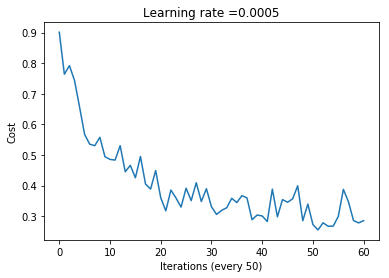

67.5


In [32]:
# model(data, labels, dims, numIterations, learningRate, lamb, batchSize, dropProb, printCost = False, showGraph = False):
testParams, testCosts, testGraph = model(
    data= trainingData, 
    labels = trainingLabels, 
    dims = defineDimensions(trainingData, trainingLabels, (2, 4, 4)),
    numIterations = 3000,
    learningRate = 0.0005,
    lamb = 0.9, 
    batchSize = 32,
    dropProb = 0.85, 
    printCost = True, 
    showGraph = True
)

testPreds = predict(testData, testParams, testLabels)
print(testPreds['accuracy'])

OK, that doesn't look half bad for a first try, and it certainly gives us confidence we don't have any bugs or other issues with the changes we've made so far.  Let's go ahead and add in the last optimization, and then we'll work on training the model.

Also note that now that we are utilizing mini-batch gradient descent the cost/convergence graph is no longer smooth although it does have an overall downward slope as the error rate of the model decreases during training.

# Adam optimization

## What is it?

### Adam

For those interested the paper on Adam can be found [here](https://arxiv.org/abs/1412.6980).

In a nutshell Adam combines Momentum and RMSprop together to get the best of both worlds.  Adam attempts to accelerate convergence while dampening the oscillations that occur during training with methods such as mini-batch gradient descent.

An excerpt from [Andrew Ng's lecture on Coursera](https://www.coursera.org/lecture/deep-neural-network/adam-optimization-algorithm-w9VCZ) fleshes things out still further:


**How does Adam work?**
1. It calculates an exponentially weighted average of past gradients, and stores it in variables $v$ (before bias correction) and $v^{corrected}$ (with bias correction). 
2. It calculates an exponentially weighted average of the squares of the past gradients, and stores it in variables $s$ (before bias correction) and $s^{corrected}$ (with bias correction). 
3. It updates parameters in a direction based on combining information from "1" and "2".

The update rule is, for $l = 1, ..., L$: 

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_1)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$
where:
- t counts the number of steps taken of Adam 
- L is the number of layers
- $\beta_1$ and $\beta_2$ are hyperparameters that control the two exponentially weighted averages. 
- $\alpha$ is the learning rate
- $\varepsilon$ is a very small number to avoid dividing by zero



And, since Adam combines aspects of Momentum and RMSprop we'll say a brief word about them both below.

### Momentum

A fantastic write-up on Momentum can be found [here](https://distill.pub/2017/momentum/).  The interactive graph at the top that models the impact of the various values of alpha and beta is worth visiting the page for alone.

In summary, _[i]nstead of using only the gradient of the current step to guide the search, momentum also accumulates the gradient of the past steps to determine the direction to go.  [1](https://blog.paperspace.com/intro-to-optimization-momentum-rmsprop-adam/)._

A very common diagram that often appears when discussing Momentum:

<img src="images/momentum.png" align="left" height="60%" width="60%" padding-left="100px" />
<p style="clear: both;">&nbsp;</p>

The goal is to reduce the movement of the blue line up and down (i.e the oscillations) while accelerating if possible the movement toward the optima (i.e. the descent).

### RMSprop

How it works:

_Rather than having just a global, scalar learning rate, we have a vector of learning rates for each trainable parameter. It is iteratively updated with a running average of magnitudes of squares of previous gradients. Changes to the weights during training are now not purely in the direction of the gradient, but rather in the direction of the elementwise division of the gradient by this vector you are maintaining.  [2](https://www.quora.com/What-is-an-intuitive-explanation-of-RMSProp)_

And here are the [equations](https://towardsdatascience.com/a-look-at-gradient-descent-and-rmsprop-optimizers-f77d483ef08b) for Momentum and RMSprop, which you can see are very similar:

<img src="images/momentum_rmsprop_equations.png" align="left" height="60%" width="60%" padding-left="100px" />
<p style="clear: both;">&nbsp;</p>

### Combined summary resource

And finally, another good resource discussing Adam, Momentum, and RMSprop can be found [here](https://blog.paperspace.com/intro-to-optimization-momentum-rmsprop-adam/).

## Implementation


In [26]:
#  Initialize Adam model params (i.e. v and s)
#  v - exponentially weighted average of the gradient
#  s - exponentially weighted average of the squared gradient
def initilizeAdamParameters(params):

    # 'Params' contains the W and b value matrices for each layer of the NN
    # So we divide by two to get the number of NN layers which we'll label 'm' similiar to other code blocks
    m = len(params) // 2
    
    v = {}
    s = {}
    
    
    for i in range(m):
        v["dw" + str(i + 1)] = np.zeros((params["w" + str(i + 1)].shape))
        v["db" + str(i + 1)] = np.zeros((params["b" + str(i + 1)].shape))
        s["dw" + str(i + 1)] = np.zeros((params["w" + str(i + 1)].shape))
        s["db" + str(i + 1)] = np.zeros((params["b" + str(i + 1)].shape))
             
    return v, s

In [27]:
# Update the model params using Adam
def updateParamsAdam(params, grads, v, s, t, learningRate, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):    
   
    # Init vars
    layers = (len(params)//2)
    # Adam moment estimate containers
    vCorrected = {}                  
    sCorrected = {}
    
    # Perform the param updates utilizing Adam
    for l in range(layers):
        # Moving average of the gradients
        v["dw" + str(l+1)] = beta1 * v['dw' + str(l+1)] + (1 - beta1) * grads['dw' + str(l+1)]
        v["db" + str(l+1)] = beta1 * v['db' + str(l+1)] + (1 - beta1) * grads['db' + str(l+1)]

        # Compute bias-corrected first moment estimate
        vCorrected["dw" + str(l+1)] = v["dw" + str(l+1)] / (1 - beta1**t)
        vCorrected["db" + str(l+1)] = v["db" + str(l+1)] / (1 - beta1**t)

        # Moving average of the squared gradients
        s["dw" + str(l+1)] = beta2 * s['dw' + str(l+1)] + (1 - beta2) * (grads['dw' + str(l+1)]**2)
        s["db" + str(l+1)] = beta2 * s['db' + str(l+1)] + (1 - beta2) * (grads['db' + str(l+1)]**2)

        # Compute bias-corrected second raw moment estimate
        sCorrected["dw" + str(l+1)] = s["dw" + str(l+1)] / (1 - beta2**t)
        sCorrected["db" + str(l+1)] = s["db" + str(l+1)] / (1 - beta2**t)

        # Update params
        params["w" + str(l+1)] = params["w" + str(l+1)] - learningRate * (vCorrected["dw" + str(l+1)] / np.sqrt(sCorrected["dw" + str(l+1)] + epsilon))
        params["b" + str(l+1)] = params["b" + str(l+1)] - learningRate * (vCorrected["db" + str(l+1)] / np.sqrt(sCorrected["db" + str(l+1)] + epsilon))

    return params, v, s

In [28]:
# Define the actual neural network classification model
def model(data, labels, dims, numIterations, learningRate, lamb, batchSize, dropProb, 
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, printCost = False, showGraph = False):
    
    # Init vars
    params = initilizeParameters(dims)
    seed = 10    # mini-batch seed
    t = 0        # Adam counter
    v, s = initilizeAdamParameters(params)
    
    #return params;
    
    costs = []
    descendingGraph = True
    
    # For each training iteration
    for i in range(0, numIterations + 1):
         
        # Create the mini batches
        seed = seed + 1   # assure we get a different batch composition each time through
        miniBatches = createMiniBatches(data, labels, batchSize, seed)
        
        for batch in miniBatches:
        
            # Get a set of data and lable records
            (batchData, batchLabels) = batch
            
            # Forward propagation
            cache = forwardPropagation(batchData, params, dropProb)

            # Cost function
            cost = calculateCost(batchLabels, params, cache, lamb)

            # Backward  propagation
            grads = backwardPropagation(batchLabels, cache, params, lamb, dropProb)

            # Gradient descent parameter update with Adam
            t = t + 1 # Update Adam counter
            params, v, s = updateParamsAdam(params, grads, v, s, t, learningRate, beta1, beta2, epsilon)    
        
        # Print the cost every N number of iterations
        if printCost and i % 500 == 0:
            print ("Cost after iteration", str(i), "is", str(cost))
        
        # Record the cost every N number of iterations
        if i % 50 == 0:
            if (len(costs) != 0) and (cost > costs[-1]):
                descendingGraph = False
            costs.append(cost)
      
    # Print the model training cost graph
    if showGraph:
        _costs = np.squeeze(costs)
        plt.plot(_costs)
        plt.ylabel('Cost')
        plt.xlabel('Iterations (every 50)')
        plt.title("Learning rate =" + str(learningRate))
        plt.show()

    return params, costs, descendingGraph

We'll save the code we just wrote above into 'utils_v2.py' and then import it for our testing below.

# Testing it out

OK, let's give our updated model a test, and then we'll do some training.

In [29]:
import numpy as np
np.random.seed(10)

import random 
random.seed(10)

from os import path
import pandas as pd
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import inspect
import time
import copy
import h5py
import math

# Contains our Adam updates...
from utils_v2 import *

In [30]:
# Load, shape, and normalize the data used for training the model
imageData = path.join("datasets", "imageData500_64pixels.hdf5")

with h5py.File(imageData, "r") as archive:   
    trainingData = np.squeeze(archive["trainData"][:])
    testData = np.squeeze(archive["testData"][:])
    trainingLabels = np.array(archive["trainLabels"][:])
    testLabels = np.array(archive["testLabels"][:])
    archive.close()

# Reshape the training and test data and label matrices
trainingData = trainingData.reshape(trainingData.shape[0], -1).T
testData = testData.reshape(testData.shape[0], -1).T

# Normalization
trainingData = trainingData/255.
testData = testData/255.

data = [trainingData, trainingLabels, testData, testLabels]

Cost after iteration 0 is 0.6977196848656624
Cost after iteration 500 is 0.002819806914564792


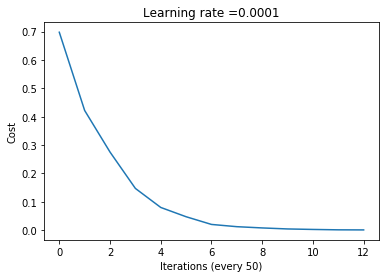

69.5


In [32]:
# def model(data, labels, dims, numIterations, learningRate, lamb, batchSize, dropProb, 
#           beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, printCost = False, showGraph = False):

dims = {}
dims["numberInputs"] = trainingData.shape[0]
dims["numberOutputs"] = trainingLabels.shape[0]
dims["hiddenLayerSizes"] = (25, 12)

testParams, testCosts, testGraph = model(
    data = trainingData, 
    labels = trainingLabels, 
    #dims = defineDimensions(trainingData, trainingLabels, (3, 5, 5)),
    dims = dims,
    numIterations = 600,
    learningRate = 0.0001,
    #lamb = 0.5, 
    lamb = 0.0, 
    batchSize = 50,
    #dropProb = 0.86,
    dropProb = 1,
    beta1 = 0.9, 
    beta2 = 0.999,  
    epsilon = 1e-8,
    printCost = True, 
    showGraph = True
)

adamPreds = predict(testData, testParams, testLabels)
print(adamPreds['accuracy'])

<h1>In progress....</h1>